# scikit-ued powdersim normalization issue

This notebook illustrates an issue with the units of the reciprocal lattice vector $q$ in skued by comparing with a ring pattern simulated with py4DSTEM.

In [1]:
import matplotlib.pyplot as plt
import numpy as np

## scikit-ued simulation

According to https://scikit-ued.readthedocs.io/en/master/tutorials/simulation.html

In [7]:
from skued import powdersim
from crystals import Crystal

Define Crystal

In [5]:
Au = Crystal.from_database('Au')

In [13]:
q = np.linspace(0, 10, 1024) # 2*np.pi/Angstrom
diff = powdersim(Au, q)

Plotting the result shows us that $q$ is not in 1/Å but in $2\pi/$Å which is confusing.

Text(0.5, 1.0, 'Polycrystalline Gold diffraction')

<Figure size 640x480 with 0 Axes>

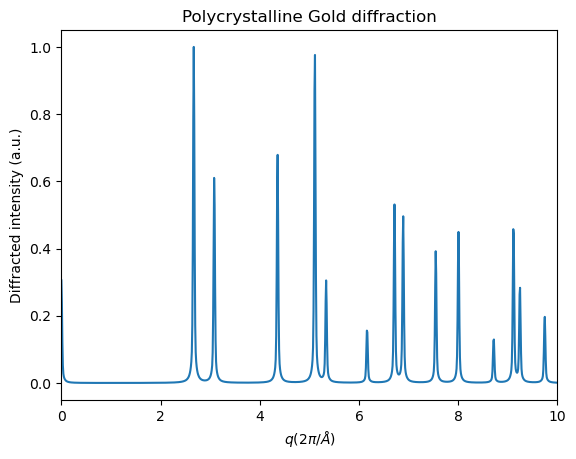

In [16]:
plt.figure()
plt.figure()
plt.plot(q, diff/diff.max())
plt.xlim([q.min(), q.max()])
plt.xlabel('$q (2\pi/\AA$)')
plt.ylabel('Diffracted intensity (a.u.)')
plt.title('Polycrystalline Gold diffraction')

Dividing $q$ by $2\pi$ leads to the correct result - compare with the py4DSTEM simulation below.

Text(0.5, 1.0, 'Polycrystalline Gold diffraction')

<Figure size 640x480 with 0 Axes>

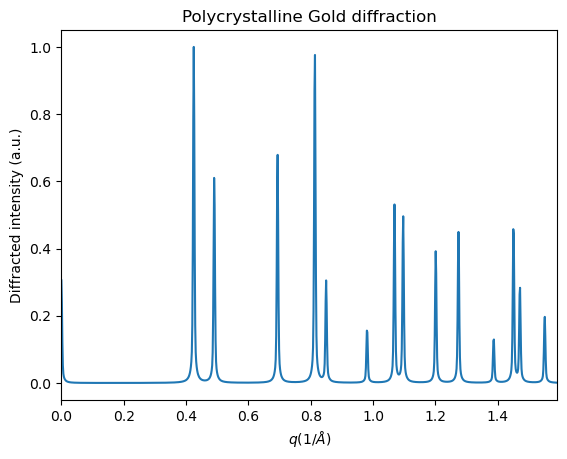

In [17]:
plt.figure()
plt.figure()
plt.plot(q/(2*np.pi), diff/diff.max())
plt.xlim([q.min()/(2*np.pi), q.max()/(2*np.pi)])
plt.xlabel('$q (1/\AA$)')
plt.ylabel('Diffracted intensity (a.u.)')
plt.title('Polycrystalline Gold diffraction')

## py4DSTEM simulation

see https://github.com/py4dstem/py4DSTEM_tutorials/blob/main/notebooks/diffraction_01_kinematical.ipynb

In [2]:
import py4DSTEM

In [3]:
# Define fcc gold structure using manual input of the crystal structure
pos = [
    [0.0, 0.0, 0.0],
    [0.0, 0.5, 0.5],
    [0.5, 0.0, 0.5],
    [0.5, 0.5, 0.0],
]
atom_num = 79
a = 4.078
cell = a

Au2 = py4DSTEM.process.diffraction.Crystal(
    pos, 
    atom_num, 
    cell)

In [7]:
# Calculate and plot the structure factors

k_max = 2.0   # This is the maximum scattering vector included in the following calculations
# k_max = 6.0

Au2.calculate_structure_factors(k_max)
#Au2.plot_structure_factors(
#    zone_axis_lattice=[3,2,1])

In [5]:
# specify the accelerating voltage
Au2.setup_diffraction(300e3)

Automatically detected point group m-3m,
 using arguments: zone_axis_range = 
[[0 1 1]
 [1 1 1]], 
 fiber_axis=None, fiber_angles=None.


Orientation plan: 100%|████████████████████████████████████████████████████| 120/120 [00:00<00:00, 1274.96 zone axes/s]


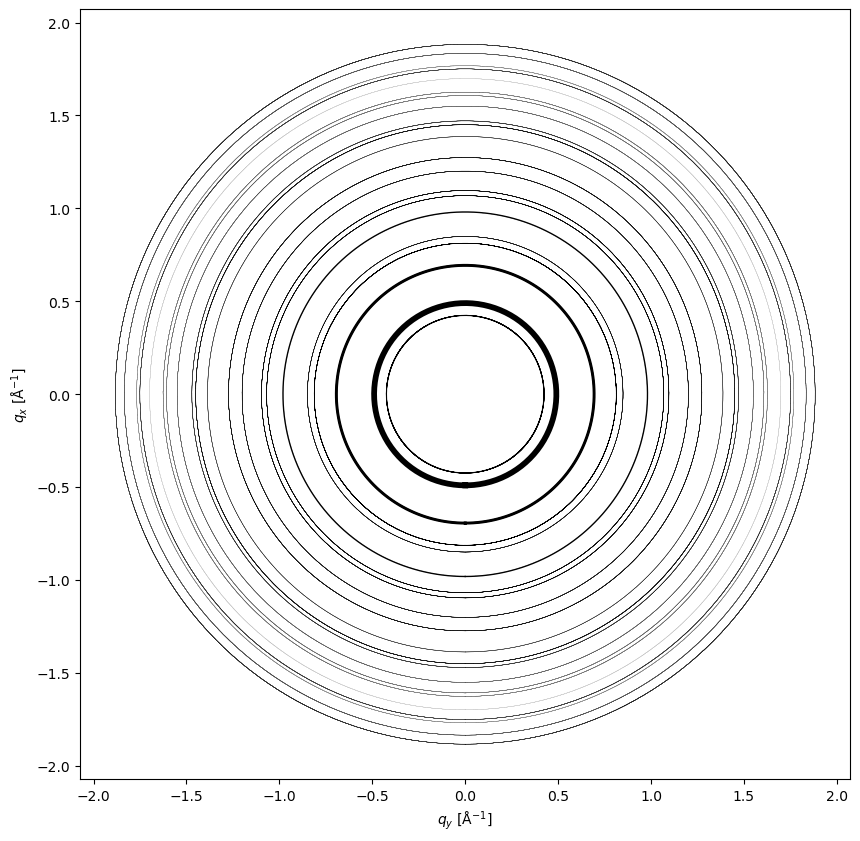

In [6]:
#pymatgen must be installed for this to work
radii, intensity = Au2.generate_ring_pattern()